In [26]:
import zipfile

# Шлях до завантаженого файлу
zip_path = '/Users/mac/Documents/Univer/ICT/bank+marketing.zip'
extract_to = '/Users/mac/Documents/Univer/ICT/bank_marketing_data'

# Розпаковка ZIP-файлу
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Файли розпаковані у: {extract_to}")





Файли розпаковані у: /Users/mac/Documents/Univer/ICT/bank_marketing_data


In [27]:
import os

# Перевірка вмісту папки
print("Вміст папки:", os.listdir(extract_to))






Вміст папки: ['bank.zip', 'bank-additional.zip']


In [29]:
import os

# Шлях до розпакованої папки
extract_to = '/Users/mac/Documents/Univer/ICT/bank_marketing_data'

# Перевірте вміст папки
print("Файли у папці:", os.listdir(extract_to))




Файли у папці: ['bank.zip', 'bank-additional.zip']


In [30]:
import zipfile
import os

# Шлях до файлу
nested_zip_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank.zip'
extract_to = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data'

# Створіть папку для розпакованих даних
os.makedirs(extract_to, exist_ok=True)

# Розпакування
with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Файли у папці після розпакування:", os.listdir(extract_to))


Файли у папці після розпакування: ['bank-names.txt', 'bank.csv', 'bank-full.csv']


In [31]:
import pandas as pd

# Шлях до файлу
csv_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank-full.csv'

# Завантаження даних
data = pd.read_csv(csv_path, sep=';')  # Використовується ';' як роздільник
print("Перші рядки даних:")
print(data.head())



Перші рядки даних:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [32]:
# Інформація про дані
print(data.info())

# Описова статистика
print(data.describe())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

In [33]:
print("Пропущені значення в даних:")
print(data.isnull().sum())


Пропущені значення в даних:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [2]:
import pandas as pd

# Шлях до файлу з даними
csv_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank-full.csv'

# Завантаження даних
data = pd.read_csv(csv_path, sep=';')  # Використовується ";" як роздільник
print(data.head())  # Перевірка перших кількох рядків



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
# Додавання категорій на основі балансу
def categorize_balance(balance):
    if balance < 0:
        return 'Negative'
    elif balance < 1000:
        return 'Low'
    elif balance < 5000:
        return 'Medium'
    else:
        return 'High'

data['balance_category'] = data['balance'].apply(categorize_balance)

# Перегляд розподілу категорій
print(data['balance_category'].value_counts())


balance_category
Low         26803
Medium      11795
Negative     3766
High         2847
Name: count, dtype: int64


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Вибір змінних для кластеризації
features = data[['age', 'balance', 'duration', 'campaign', 'previous']]

# Масштабування даних
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Виконання кластеризації
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Перегляд кількості клієнтів у кожному кластері
print(data['cluster'].value_counts())


cluster
0    26734
2    17066
1     1411
Name: count, dtype: int64


In [6]:
# Вибір тільки числових стовпців
numeric_columns = data.select_dtypes(include=['number']).columns

# Групування за кластерами та обчислення середніх значень тільки для числових даних
cluster_analysis = data.groupby('cluster')[numeric_columns].mean()

# Виведення результату
print(cluster_analysis)


               age       balance        day    duration  campaign      pdays  \
cluster                                                                        
0        33.914079    861.337248  15.641954  272.988516  2.411648  44.823259   
1        43.424522  13605.615875  15.953933  282.442240  2.548547  39.974486   
2        51.730693   1134.722138  16.051857  232.931560  3.333353  32.970526   

         previous  cluster  
cluster                     
0        0.627628      0.0  
1        0.875266      1.0  
2        0.481835      2.0  


Інтерпретація кластерів
Кластер 0:
Середній вік: 33.91 років (наймолодша група).
Середній баланс: €861.34 (низький середній баланс).
Середня тривалість контакту: 272.99 секунд (високий рівень взаємодії).
Середня кількість кампаній: 2.41 (відносно невелика кількість контактів).
Середній pdays: 44.82 дні (порівняно тривалий час із моменту останнього контакту).
Кластер 1:
Середній вік: 43.42 років (середній вік).
Середній баланс: €13,605.62 (найвищий середній баланс, клієнти з високими доходами).
Середня тривалість контакту: 282.44 секунд (дуже високий рівень взаємодії).
Середня кількість кампаній: 2.55 (середня кількість контактів).
Середній pdays: 39.97 дні (дещо коротший час із моменту останнього контакту).
Кластер 2:
Середній вік: 51.73 років (найстарша група).
Середній баланс: €1,134.72 (трохи вище, ніж у кластері 0, але значно нижче, ніж у кластері 1).
Середня тривалість контакту: 232.93 секунд (найнижчий рівень взаємодії).
Середня кількість кампаній: 3.33 (найвищий рівень контактів).
Середній pdays: 32.97 дні (найкоротший час із моменту останнього контакту).
Висновки про кластери
Кластер 0:

Молодші клієнти з низьким балансом.
Хороший рівень взаємодії, але невелика кількість контактів.
Потенційно група клієнтів, яких можна залучати для довгострокового обслуговування.
Кластер 1:

Клієнти середнього віку з найвищим балансом.
Дуже високий рівень взаємодії, хоча кількість контактів залишається середньою.
Це прибутковий сегмент із високим потенціалом.
Кластер 2:

Старші клієнти з помірним балансом.
Відносно низький рівень взаємодії, але більша кількість контактів.
Група клієнтів, яка може бути менш зацікавленою або важкою для утримання.

Що робити далі?
Персоналізовані стратегії:

Для кластеру 0: Пропонуйте молодшим клієнтам вигідні умови для утримання та лояльності.
Для кластеру 1: Інвестуйте більше ресурсів у взаємодію з цим сегментом, оскільки вони мають найвищий баланс.
Для кластеру 2: Скоротіть кількість контактів, фокусуючись на якісній взаємодії.
Додатковий аналіз:

Використайте інші змінні (наприклад, marital, job, education) для побудови детальнішого профілю клієнтів у кожному кластері.
Візуалізація кластерів:

Побудуйте графіки для розподілу віку, балансу та тривалості контактів для кожного кластеру.

In [7]:
import pandas as pd

# Шлях до вашого файлу
csv_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank-full.csv'

# Завантаження даних
data = pd.read_csv(csv_path, sep=';')


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Вибір числових характеристик
features = data[['age', 'balance', 'duration', 'campaign', 'previous']]

# Масштабування даних
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Кластеризація
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)


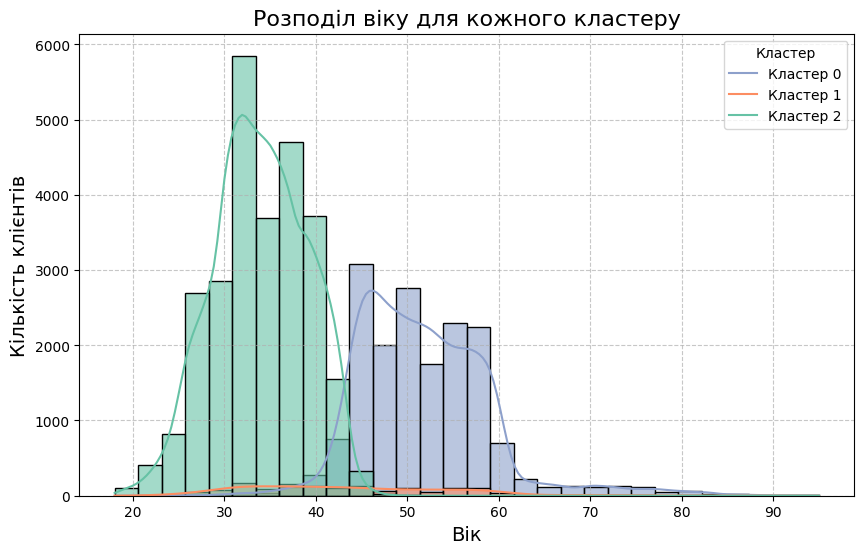

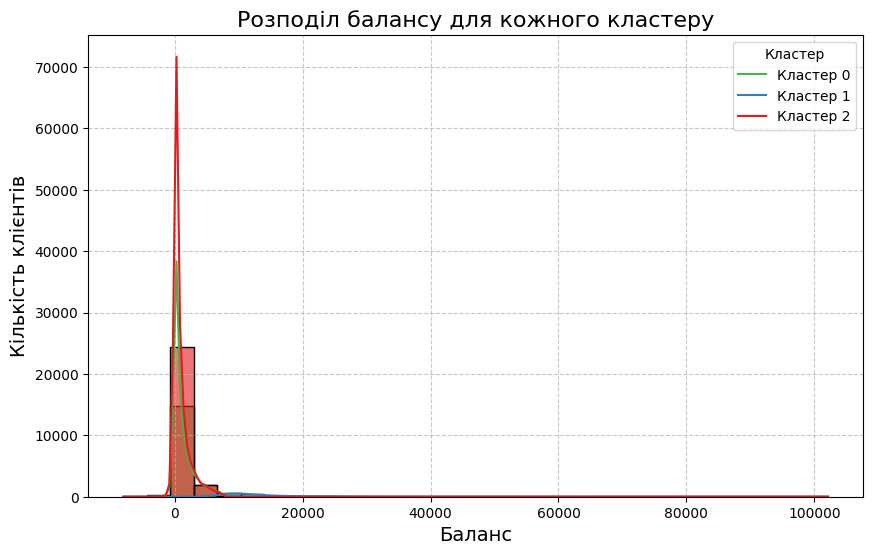

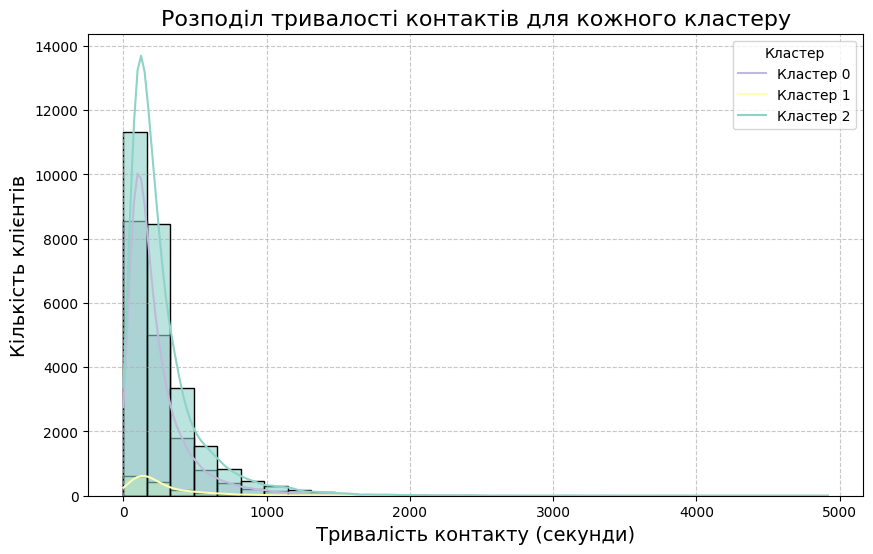

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Шлях до CSV-файлу
csv_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank-full.csv'

# Завантаження даних
data = pd.read_csv(csv_path, sep=';')

# Вибір числових характеристик
features = data[['age', 'balance', 'duration', 'campaign', 'previous']]

# Масштабування даних
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Кластеризація
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Графік розподілу віку для кожного кластеру
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='cluster', kde=True, bins=30, palette='Set2', alpha=0.6)
plt.title('Розподіл віку для кожного кластеру', fontsize=16)
plt.xlabel('Вік', fontsize=14)
plt.ylabel('Кількість клієнтів', fontsize=14)
plt.legend(title='Кластер', labels=['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Графік розподілу балансу для кожного кластеру
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='balance', hue='cluster', kde=True, bins=30, palette='Set1', alpha=0.6)
plt.title('Розподіл балансу для кожного кластеру', fontsize=16)
plt.xlabel('Баланс', fontsize=14)
plt.ylabel('Кількість клієнтів', fontsize=14)
plt.legend(title='Кластер', labels=['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Графік розподілу тривалості контактів для кожного кластеру
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', hue='cluster', kde=True, bins=30, palette='Set3', alpha=0.6)
plt.title('Розподіл тривалості контактів для кожного кластеру', fontsize=16)
plt.xlabel('Тривалість контакту (секунди)', fontsize=14)
plt.ylabel('Кількість клієнтів', fontsize=14)
plt.legend(title='Кластер', labels=['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [10]:
# Функція для виявлення аномалій за межами IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Виявлення аномалій у стовпці 'balance'
balance_outliers = detect_outliers_iqr(data, 'balance')
print(f"Кількість аномалій у балансі: {len(balance_outliers)}")


Кількість аномалій у балансі: 4729


In [11]:
from scipy.stats import zscore

# Обчислення Z-score для числових колонок
data['balance_zscore'] = zscore(data['balance'])

# Ідентифікація аномалій (Z-score > 3 або < -3)
zscore_outliers = data[(data['balance_zscore'] > 3) | (data['balance_zscore'] < -3)]
print(f"Кількість аномалій за Z-score у балансі: {len(zscore_outliers)}")


Кількість аномалій за Z-score у балансі: 745


In [12]:
from sklearn.ensemble import IsolationForest

# Вибір характеристик
features = data[['age', 'balance', 'duration']]

# Масштабування даних
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Модель Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(features_scaled)

# Ідентифікація аномалій (-1 позначає аномалію)
anomalies = data[data['anomaly'] == -1]
print(f"Кількість аномалій: {len(anomalies)}")


Кількість аномалій: 453


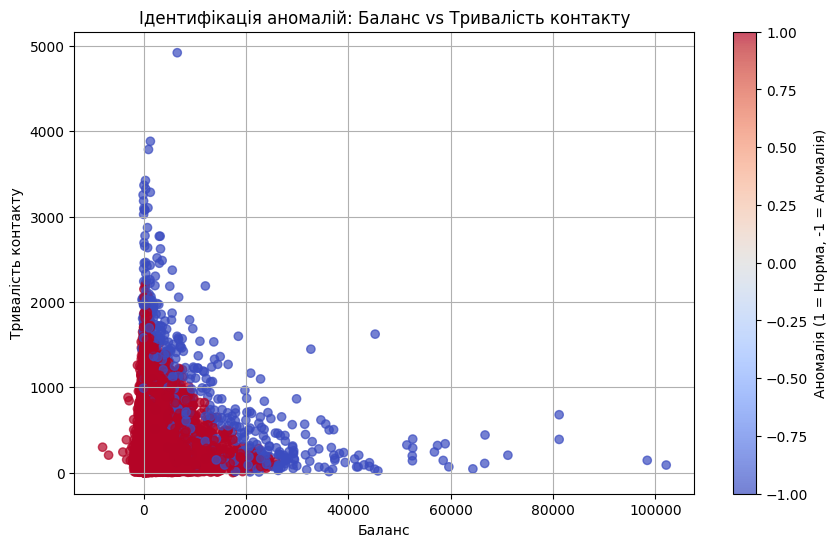

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['balance'], data['duration'], c=data['anomaly'], cmap='coolwarm', alpha=0.7)
plt.title('Ідентифікація аномалій: Баланс vs Тривалість контакту')
plt.xlabel('Баланс')
plt.ylabel('Тривалість контакту')
plt.colorbar(label='Аномалія (1 = Норма, -1 = Аномалія)')
plt.grid(True)
plt.show()


Підходи до роботи з аномаліями
Аналіз: Вивчіть, чи є аномалії релевантними (унікальні клієнти) або помилками (некоректні значення).
Очистка: Видаліть або скоригуйте неправильні значення.
Сегментація: Обробляйте аномалії окремо, якщо вони мають бізнес-цінність.

/var/folders/m6/cqv1zhq10ds_r6drrn1y2vzw0000gn/T/ipykernel_41764/2176463655.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_counts.index, y=profit_counts.values, palette='coolwarm')


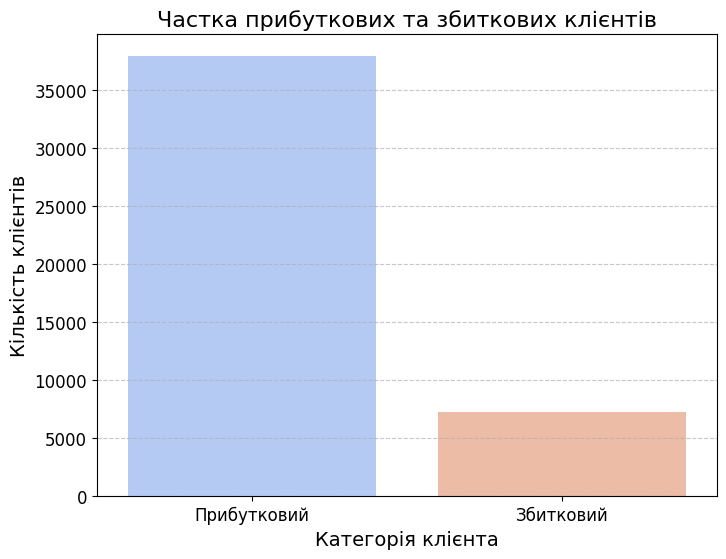

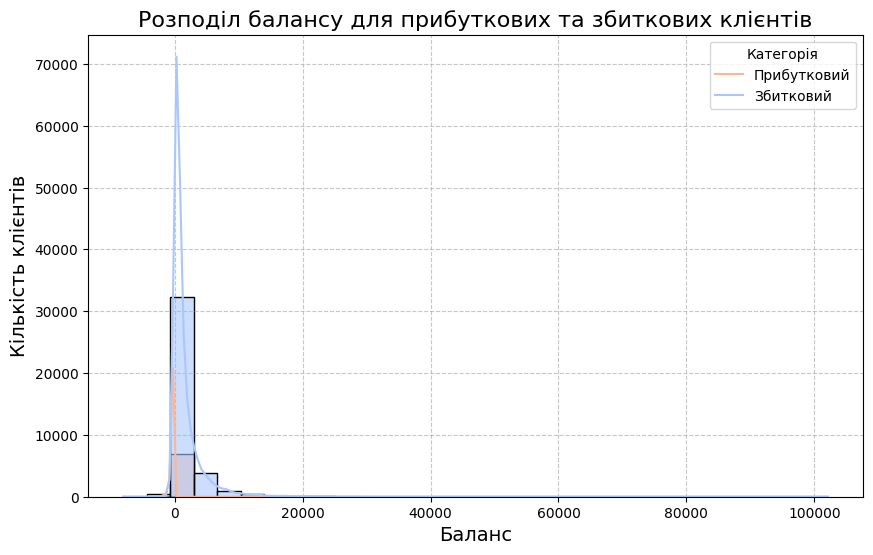

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шлях до CSV-файлу
csv_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank-full.csv'

# Завантаження даних
data = pd.read_csv(csv_path, sep=';')

# Визначення прибуткових і збиткових клієнтів на основі балансу
data['profit_status'] = data['balance'].apply(lambda x: 'Прибутковий' if x > 0 else 'Збитковий')

# Підрахунок кількості клієнтів у кожній категорії
profit_counts = data['profit_status'].value_counts()

# Візуалізація: Частка прибуткових та збиткових клієнтів
plt.figure(figsize=(8, 6))
sns.barplot(x=profit_counts.index, y=profit_counts.values, palette='coolwarm')
plt.title('Частка прибуткових та збиткових клієнтів', fontsize=16)
plt.xlabel('Категорія клієнта', fontsize=14)
plt.ylabel('Кількість клієнтів', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Додаткова візуалізація: Розподіл балансу для прибуткових та збиткових клієнтів
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='balance', hue='profit_status', kde=True, palette='coolwarm', bins=30, alpha=0.6)
plt.title('Розподіл балансу для прибуткових та збиткових клієнтів', fontsize=16)
plt.xlabel('Баланс', fontsize=14)
plt.ylabel('Кількість клієнтів', fontsize=14)
plt.legend(title='Категорія', labels=['Прибутковий', 'Збитковий'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Що робить цей код:
Завантаження даних: Завантажується файл bank-full.csv.
Класифікація клієнтів:
Прибутковий: якщо баланс клієнта > 0.
Збитковий: якщо баланс клієнта ≤ 0.
Візуалізація:
Бар-графік частки прибуткових та збиткових клієнтів.
Гістограма розподілу балансу для обох категорій.

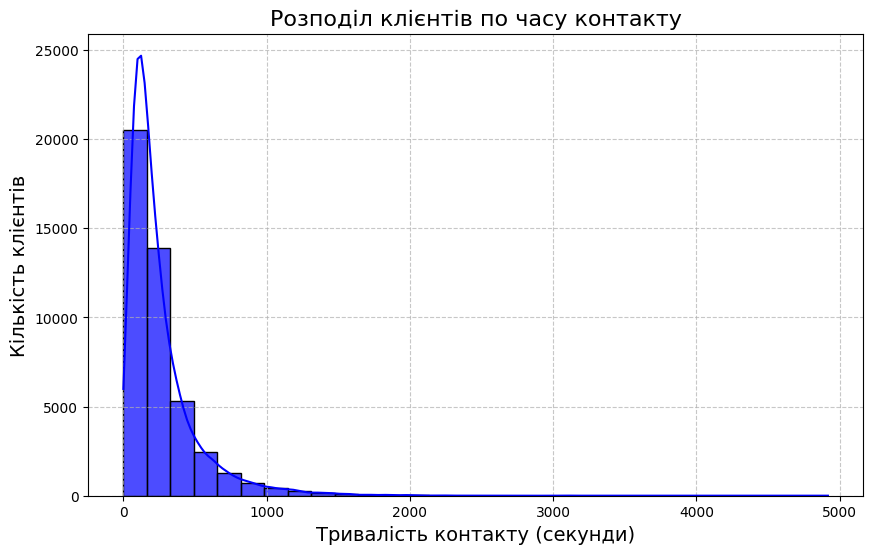

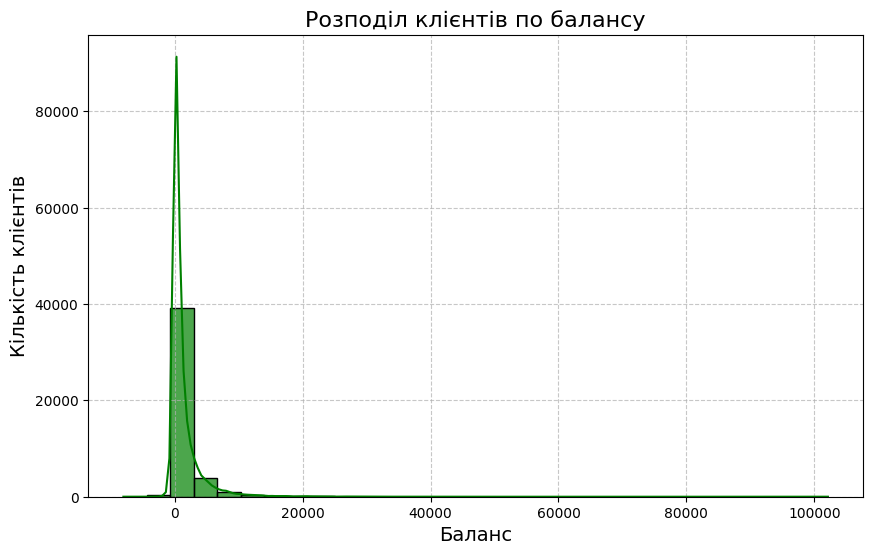

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шлях до CSV-файлу
csv_path = '/Users/mac/Documents/Univer/ICT/bank_marketing_data/bank_data/bank-full.csv'

# Завантаження даних
data = pd.read_csv(csv_path, sep=';')

# Візуалізація стандартного розподілу клієнтів по часу контакту (duration)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Розподіл клієнтів по часу контакту', fontsize=16)
plt.xlabel('Тривалість контакту (секунди)', fontsize=14)
plt.ylabel('Кількість клієнтів', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Візуалізація стандартного розподілу клієнтів по балансу (balance)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='balance', kde=True, bins=30, color='green', alpha=0.7)
plt.title('Розподіл клієнтів по балансу', fontsize=16)
plt.xlabel('Баланс', fontsize=14)
plt.ylabel('Кількість клієнтів', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
